In [153]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, mean_squared_error, r2_score, plot_confusion_matrix, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from dython.nominal import associations
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
df = pd.read_csv('Leads.csv')


<h2>  Logistic Regression Binary Classification "Lead Scoring" </h2>

### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.

When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’.
### Goal
Build and find the best predictive model which could identify users who are potentially convertible

<h2> EDA </h2>

In [3]:
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [6]:
#percentage of missing values
round(df.isna().sum() / len(df) * 100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
#any duplicates?
df.duplicated().sum()

0

In [8]:
converted = df['Converted'].value_counts()
converted

0    5679
1    3561
Name: Converted, dtype: int64

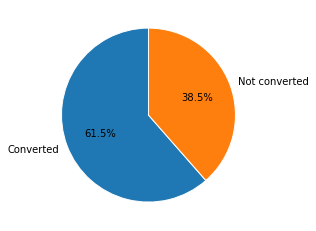

In [9]:
#Lets see what are the current statistics of converted users (our target variable)
conv_values = converted
conv_labels = ["Converted", "Not converted"]
plt.pie(conv_values, labels=conv_labels, autopct='%0.1f%%', startangle = 90, wedgeprops={'edgecolor': 'white'})
plt.show()

### Inspecting values of the columns

In [10]:
df['Asymmetrique Profile Score'].value_counts(dropna=False)

NaN     4218
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [11]:
df['Asymmetrique Activity Index'].value_counts(dropna=False)

NaN          4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [12]:
df['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Specialization'>

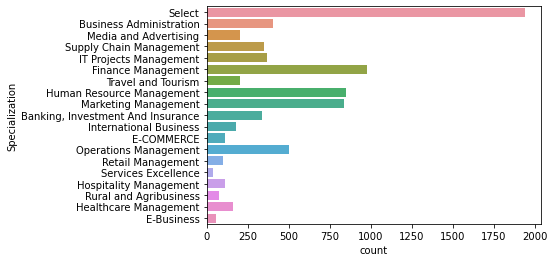

In [13]:
sns.countplot(y=df['Specialization'], dodge=False, data=df)

In [14]:
df.City.isna().sum()

1420

<AxesSubplot:xlabel='count', ylabel='City'>

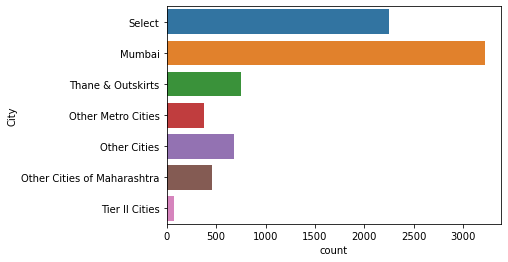

In [15]:
sns.countplot(y=df['City'], dodge=False, data=df)

In [16]:
#percentage of values in City columns
100*df.City.value_counts(normalize=True, dropna=False)

Mumbai                         34.870130
Select                         24.339827
NaN                            15.367965
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [17]:
#Besides NaN values, we can see a large number "Select" values which are not filled by the customer therefore -> equal to NaN.
#E.g.'City' column has 34.8% Mumbai + 24.3% 'Select' (or NaN values) + 15.3% Nan values = 74.4%. -> Data is 74.4% homogeneous

In [18]:
#Exploring to find more columns with "Select" values and homogenous data
for c in df.columns:
    print(df[c].value_counts())

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

In [19]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [20]:
df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [21]:
df['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [22]:
df['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [23]:
df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [24]:
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [25]:
 df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [26]:
df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [27]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [28]:
df['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [29]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [30]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [31]:
df['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [32]:
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [33]:
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [34]:
df['Lead Quality'].value_counts(dropna=False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Lead Quality'>

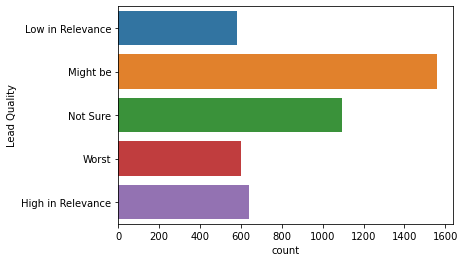

In [35]:
sns.countplot(y=df['Lead Quality'])

In [36]:
#lets see visually the ratio of  NaN values 

In [37]:
df["Lead Quality"] = df['Lead Quality'].fillna('Other')

<AxesSubplot:xlabel='count', ylabel='Lead Quality'>

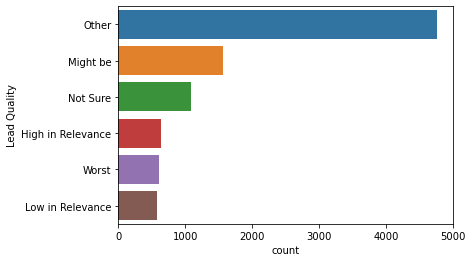

In [38]:
sns.countplot(y=df['Lead Quality'] ,order=df['Lead Quality'].value_counts().index)

### Visual value representation 

<AxesSubplot:xlabel='count', ylabel='Specialization'>

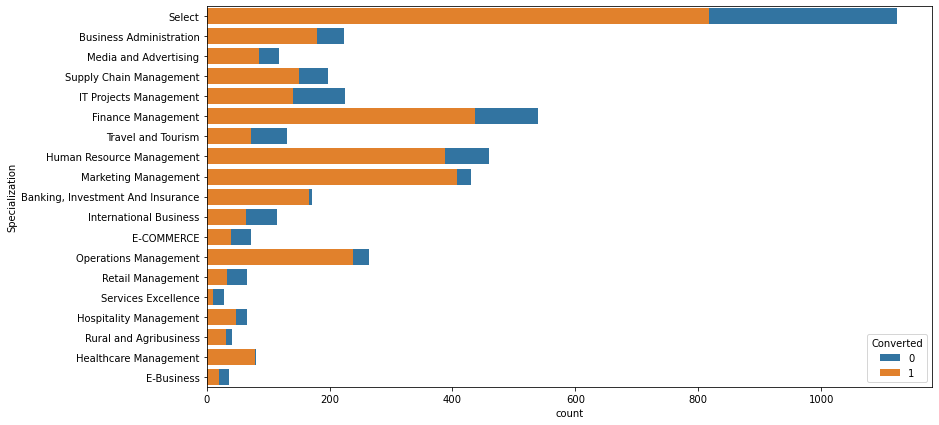

In [39]:
#Most converted customers are from Finance Mngmt., HR Mngmt. and Marketing Mngmt.
fig, ax = plt.subplots(figsize=(13,7))
sns.countplot(y=df['Specialization'], hue=df['Converted'], dodge=False, data=df, ax=ax)

<AxesSubplot:xlabel='count', ylabel='Tags'>

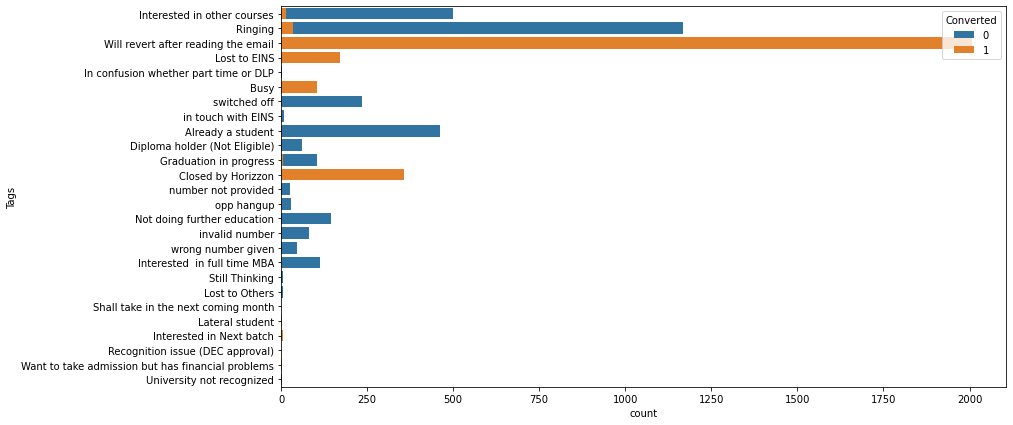

In [40]:
#Mostly converted customers are ones who were target by email (feature: Will revert after reading the email)
fig, ax = plt.subplots(figsize=(13,7))
sns.countplot(y=df['Tags'], hue=df['Converted'], dodge=False, data=df, ax=ax)

<AxesSubplot:xlabel='Asymmetrique Activity Score', ylabel='Asymmetrique Profile Score'>

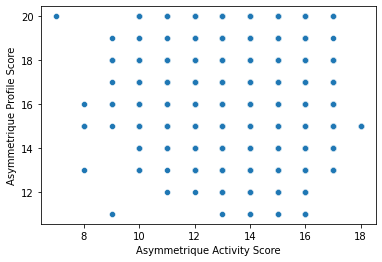

In [41]:
#looking for correlation between 2 variables 
sns.scatterplot(x=df['Asymmetrique Activity Score'], y=df['Asymmetrique Profile Score'])

<AxesSubplot:>

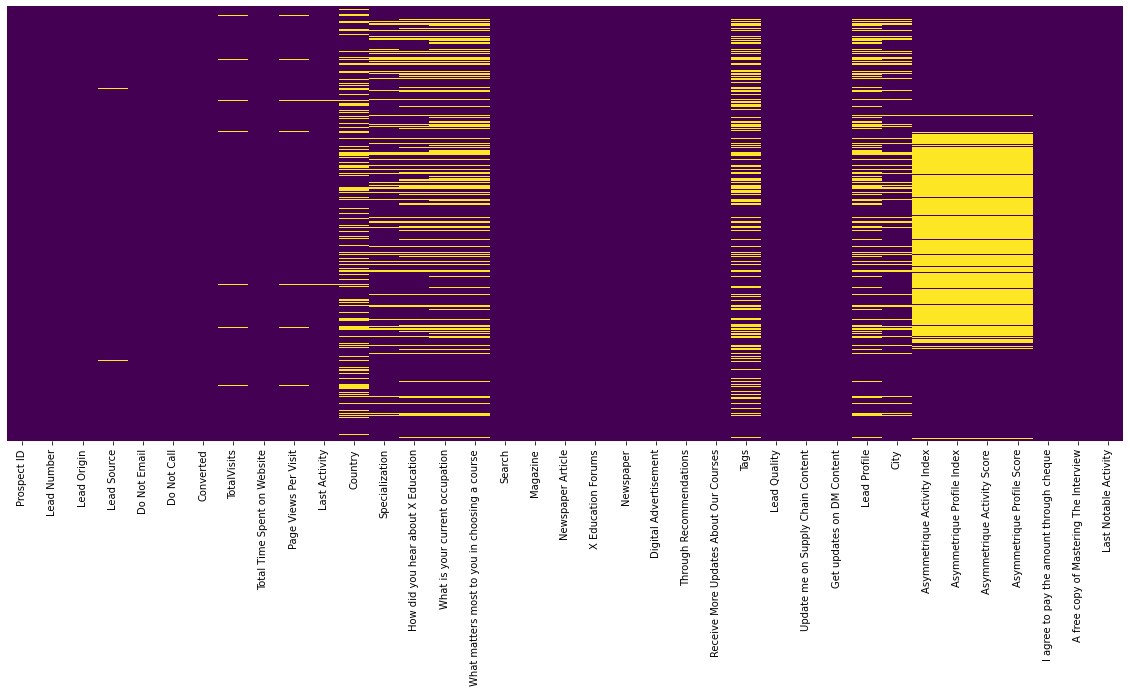

In [42]:
#NaN values with heatmap
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(df.isnull(), yticklabels = False, xticklabels = 1, cbar=False, cmap='viridis', ax=ax)

C:\Users\Seinf\Anaconda3\envs\DAenv\lib\site-packages\dython\nominal.py:137: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False
  warnings.warn(


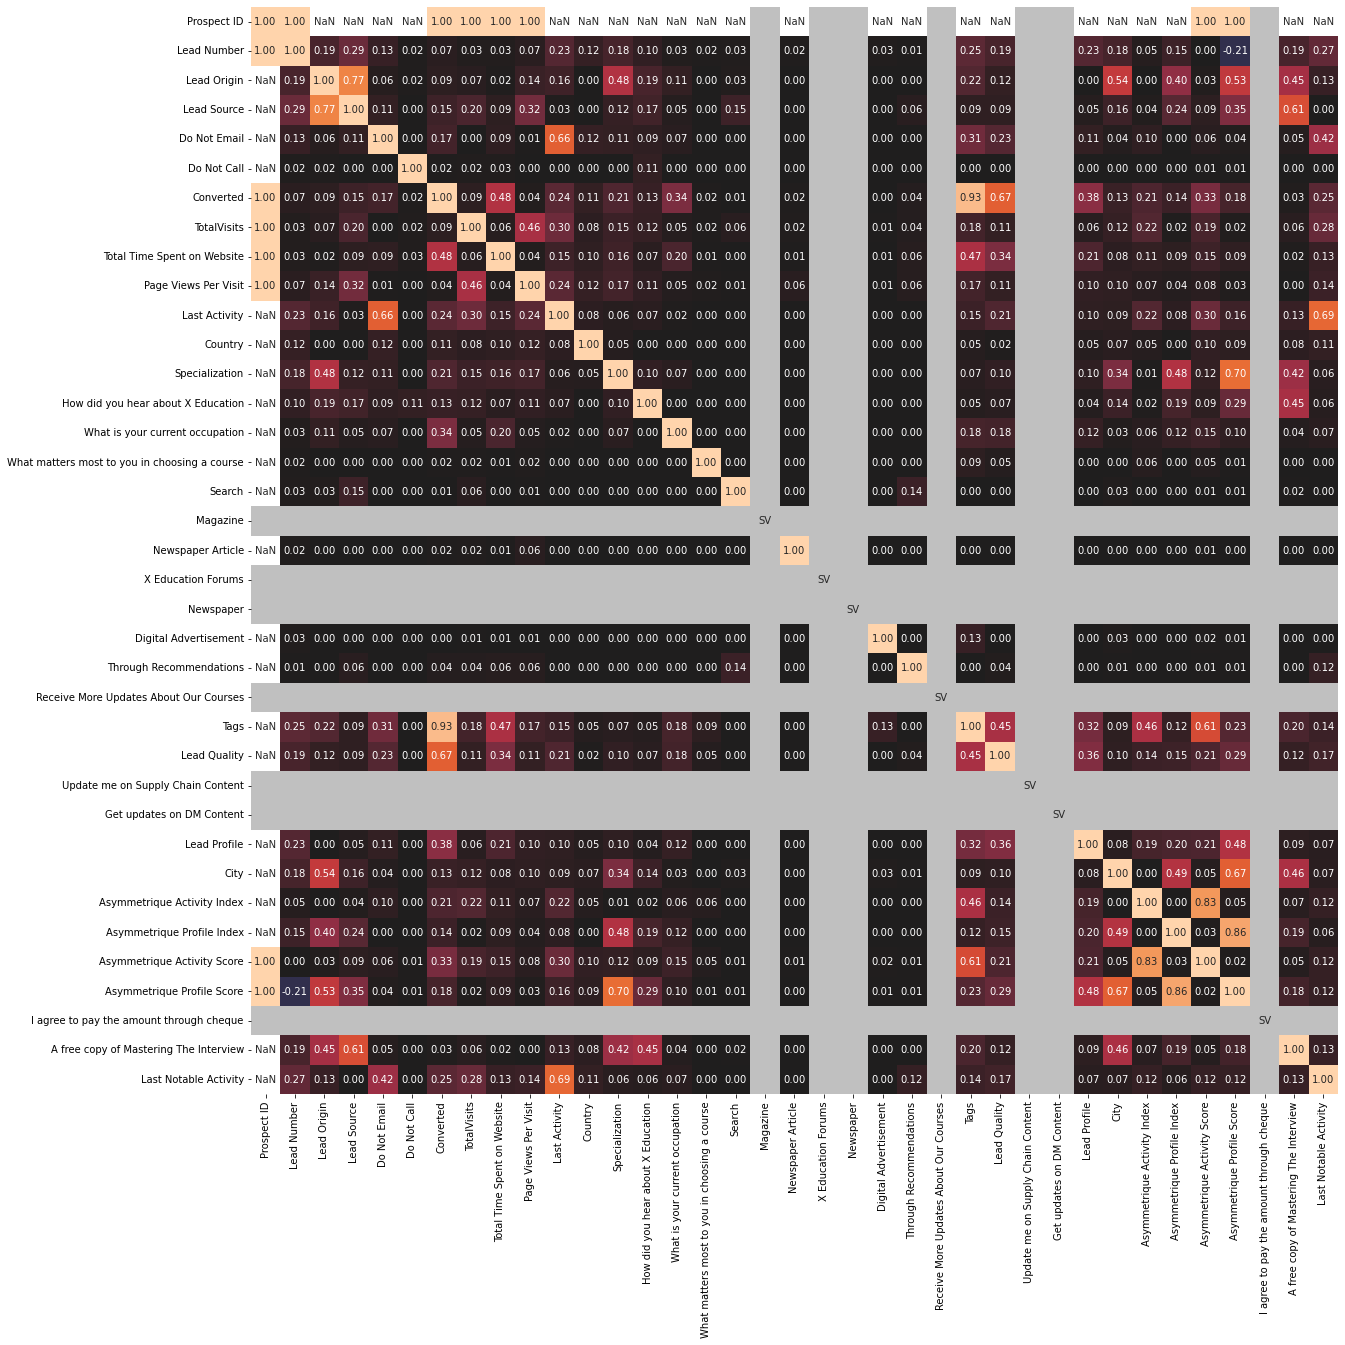

{'corr':                                                Prospect ID  Lead Number  \
 Prospect ID                                            1.0     1.000000   
 Lead Number                                            1.0     1.000000   
 Lead Origin                                            0.0     0.193722   
 Lead Source                                            0.0     0.294874   
 Do Not Email                                           0.0     0.132354   
 Do Not Call                                            0.0     0.023033   
 Converted                                              1.0     0.070878   
 TotalVisits                                            1.0     0.033116   
 Total Time Spent on Website                            1.0     0.034659   
 Page Views Per Visit                                   1.0     0.071388   
 Last Activity                                          0.0     0.232056   
 Country                                                0.0     0.123692   
 Spe

In [43]:
#Dython method plots features correlation and association for mixed data-sets (categorical and continuous features)
associations(df, nan_strategy='drop_samples',  cbar=False, figsize=(20, 20))

## Cleaning data

### Inspecting and dropping

In [44]:
#Columns with unique identifiers dropped 
df['Prospect ID'].nunique(), df['Lead Number'].nunique()

df.drop(['Prospect ID','Lead Number'], axis=1, inplace = True)

In [45]:
#The methods used exploring the data support to drop these columns due to its homogeneousity
df.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Newspaper', 'Digital Advertisement',
         'Receive More Updates About Our Courses', 'Newspaper Article','Through Recommendations','X Education Forums' ,
         'Magazine', 'What matters most to you in choosing a course','Search', 'Do Not Call','Country',
         'Update me on Supply Chain Content'], axis=1, inplace=True)

In [46]:
# 'Select' is also an empty value, lets replace it
round(df['Lead Profile'].value_counts(dropna=False),2)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [47]:
df['Lead Profile']=df['Lead Profile'].fillna('Select')

In [48]:
round(df['Lead Profile'].value_counts(normalize=True),2)

Select                         0.74
Potential Lead                 0.17
Other Leads                    0.05
Student of SomeSchool          0.03
Lateral Student                0.00
Dual Specialization Student    0.00
Name: Lead Profile, dtype: float64

In [49]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [50]:
df['Lead Source'] = df['Lead Source'].replace(['blog',
 'Pay per Click Ads',
 'bing',
 'Social Media',
 'WeLearn',
 'Click2call',
 'Live Chat',
 'welearnblog_Home',
 'youtubechannel',
 'testone',
 'Press_Release',
 'NC_EDM'], 'Other Source')

In [51]:
df['Lead Source']=np.where(df['Lead Source']=='google','Google', df['Lead Source'])

<AxesSubplot:xlabel='count', ylabel='Lead Source'>

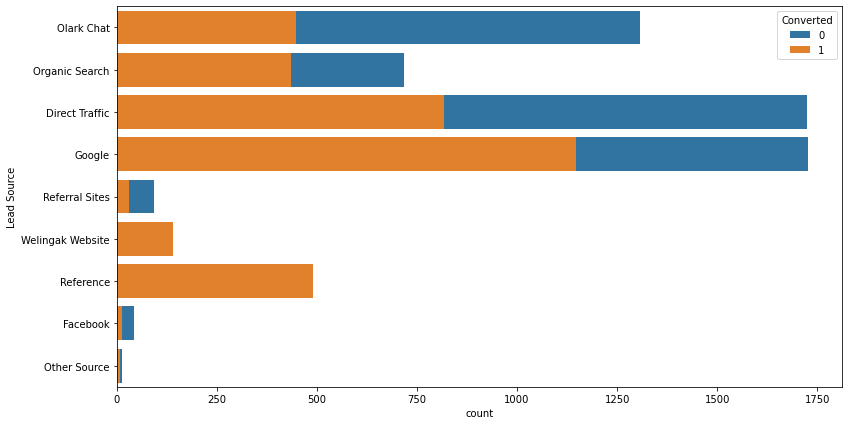

In [52]:
#Direct trafficking and Google are the leading source for converting
fig, ax = plt.subplots(figsize=(13,7))
sns.countplot(y=df['Lead Source'], hue=df['Converted'], dodge=False, data=df, ax=ax)

In [53]:
#City column will be replaced with the most frequent value
df.City.value_counts(normalize=True, dropna=False)

Mumbai                         0.348701
Select                         0.243398
NaN                            0.153680
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [54]:
df.City = df.City.fillna('Select')

In [55]:
df.City = df.City.replace('Select', 'Mumbai')

In [56]:
#Same with this label
df['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [57]:
#Lets drop 'Lead Profile', 'How did you hear about X Education' as it > 75% NaN values ('Select)
df=df.drop(['Lead Profile', 'How did you hear about X Education'], axis=1)

In [58]:
#Nan values rows -> are dropped (low number) + Specialization
df.dropna(subset=['Lead Source','TotalVisits','Page Views Per Visit','Last Activity' ], inplace=True)

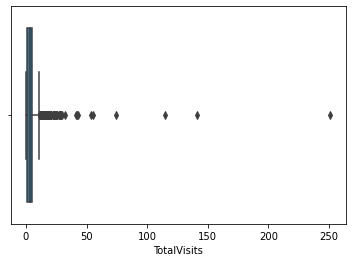

In [59]:
sns.boxplot(x=df['TotalVisits'])
plt.show()

In [60]:
#records > 70 considered outliers 
df.drop(df[df['TotalVisits'] >= 70].index, inplace = True)

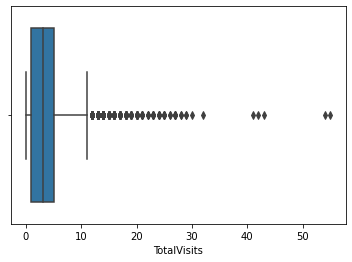

In [61]:
sns.boxplot(x=df['TotalVisits'])
plt.show()

### NaN values replaced by %

In [62]:
#NaN values takes 45%. Hereby, I will use this percentage to assign NaN values according to the percentage of other values

In [63]:
#1 
df['Asymmetrique Activity Index'].value_counts(normalize=True, dropna=False)

NaN          0.457552
02.Medium    0.412128
01.High      0.090408
03.Low       0.039912
Name: Asymmetrique Activity Index, dtype: float64

In [64]:
p=df['Asymmetrique Activity Index'].value_counts(normalize=True)
m=df['Asymmetrique Activity Index'].isnull()

filler = np.random.choice(p.index, size=m.sum(), p=p)

df.loc[m,'Asymmetrique Activity Index']=filler

In [65]:
df['Asymmetrique Activity Index'].value_counts(normalize=True)

02.Medium    0.764388
01.High      0.162955
03.Low       0.072657
Name: Asymmetrique Activity Index, dtype: float64

In [66]:
#2
p=df['Asymmetrique Activity Score'].value_counts(normalize=True)
m=df['Asymmetrique Activity Score'].isnull()

filler = np.random.choice(p.index, size=m.sum(), p=p)

df.loc[m,'Asymmetrique Activity Score']=filler

In [67]:
#3
p=df['Asymmetrique Profile Index'].value_counts(normalize=True)
m=df['Asymmetrique Profile Index'].isnull()

filler = np.random.choice(p.index, size=m.sum(), p=p)

df.loc[m,'Asymmetrique Profile Index']=filler

In [68]:
#4
p=df['Asymmetrique Profile Score'].value_counts(normalize=True)
m=df['Asymmetrique Profile Score'].isnull()

filler = np.random.choice(p.index, size=m.sum(), p=p)

df.loc[m,'Asymmetrique Profile Score']=filler

In [69]:
#5
round(df['What is your current occupation'].value_counts(normalize=True), 4)

Unemployed              0.8568
Working Professional    0.1060
Student                 0.0322
Other                   0.0023
Housewife               0.0014
Businessman             0.0013
Name: What is your current occupation, dtype: float64

In [70]:
df['What is your current occupation']=df['What is your current occupation'].fillna(pd.Series(np.random.choice
   (['Unemployed', 'Working Professional', 'Student','Other', 'Housewife', 'Businessman'],
                                                     p=[0.8568, 0.1060, 0.0322, 0.0023, 0.0014, 0.0013], size=len(df))))

In [71]:
df['Tags'].value_counts(dropna=False)

NaN                                                  3325
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           508
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           144
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

In [72]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              7693
Working Professional     998
Student                  282
NaN                       51
Other                     22
Housewife                 14
Businessman               10
Name: What is your current occupation, dtype: int64

In [73]:
#filling with the most frequent value
df['What is your current occupation']=df['What is your current occupation'].fillna('Unemployed')

In [74]:
#6
#Filling NaN values according to percentage 
p=df.Tags.value_counts(normalize=True)
m=df.Tags.isnull()

filler = np.random.choice(p.index, size=m.sum(), p=p)

df.loc[m,'Tags']=filler

In [75]:
#Merging Select and NaN values
df['Specialization'].value_counts(dropna=False)

df['Specialization']=np.where(df['Specialization']=='Select', np.nan , df['Specialization'])

In [76]:
df['Specialization'].value_counts(dropna=False)

NaN                                  3281
Finance Management                    959
Human Resource Management             836
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               345
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 72
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [77]:
#7
#Filling NaN values according to percentage 
p=df.Specialization.value_counts(normalize=True)
m=df.Specialization.isnull()

filler = np.random.choice(p.index, size=m.sum(), p=p)

df.loc[m,'Specialization']=filler

In [78]:
#Data is clean and ready for the next steps
df.isna().sum(), df.shape

(Lead Origin                               0
 Lead Source                               0
 Do Not Email                              0
 Converted                                 0
 TotalVisits                               0
 Total Time Spent on Website               0
 Page Views Per Visit                      0
 Last Activity                             0
 Specialization                            0
 What is your current occupation           0
 Tags                                      0
 Lead Quality                              0
 City                                      0
 Asymmetrique Activity Index               0
 Asymmetrique Profile Index                0
 Asymmetrique Activity Score               0
 Asymmetrique Profile Score                0
 A free copy of Mastering The Interview    0
 Last Notable Activity                     0
 dtype: int64,
 (9070, 19))

In [79]:
df['Asymmetrique Activity Index'].value_counts(dropna=False)

02.Medium    6933
01.High      1478
03.Low        659
Name: Asymmetrique Activity Index, dtype: int64

In [80]:
df.reset_index(drop=True)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Human Resource Management,Unemployed,Interested in other courses,Low in Relevance,Mumbai,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Finance Management,Unemployed,Ringing,Other,Mumbai,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Human Resource Management,Unemployed,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9065,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Will revert after reading the email,High in Relevance,Mumbai,02.Medium,01.High,15.0,17.0,No,Email Marked Spam
9066,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,wrong number given,Might be,Mumbai,02.Medium,01.High,14.0,19.0,Yes,SMS Sent
9067,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,invalid number,Not Sure,Mumbai,02.Medium,01.High,13.0,20.0,Yes,SMS Sent
9068,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Unemployed,Interested in other courses,Other,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,SMS Sent


In [81]:
df.to_csv('Leads_cleaned.csv', index=False)

## Part: Model

### Data Pre-processing

In [82]:
data = pd.read_csv('Leads_cleaned.csv')

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9070 entries, 0 to 9069
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9070 non-null   object 
 1   Lead Source                             9070 non-null   object 
 2   Do Not Email                            9070 non-null   object 
 3   Converted                               9070 non-null   int64  
 4   TotalVisits                             9070 non-null   float64
 5   Total Time Spent on Website             9070 non-null   int64  
 6   Page Views Per Visit                    9070 non-null   float64
 7   Last Activity                           9070 non-null   object 
 8   Specialization                          9070 non-null   object 
 9   What is your current occupation         9070 non-null   object 
 10  Tags                                    9070 non-null   obje

In [84]:
#Encoding binary features
data['Do Not Email']=data['Do Not Email'].map({'No':0,'Yes':1})

In [85]:
data['A free copy of Mastering The Interview']=data['A free copy of Mastering The Interview'].map({'No':0,'Yes':1})

In [86]:
#Assign target variable
y = data['Converted']

In [87]:
#Drop target variable
X=data.drop(['Converted'],axis=1)

In [88]:
#Get numeric data
X_num = X._get_numeric_data()
#These columns belong to categorical df as they're binary
X_num.drop(columns=['Do Not Email', 'A free copy of Mastering The Interview'], inplace=True)

In [89]:
X_num

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,0.0,0,0.00,15.0,15.0
1,5.0,674,2.50,15.0,15.0
2,2.0,1532,2.00,14.0,20.0
3,1.0,305,1.00,13.0,17.0
4,2.0,1428,1.00,15.0,18.0
...,...,...,...,...,...
9065,8.0,1845,2.67,15.0,17.0
9066,2.0,238,2.00,14.0,19.0
9067,2.0,199,2.00,13.0,20.0
9068,3.0,499,3.00,15.0,16.0


In [90]:
X_cat = X.drop(columns=X_num.columns)
X_cat

,Lead Origin,Lead Source,Do Not Email,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,Page Visited on Website,Human Resource Management,Unemployed,Interested in other courses,Low in Relevance,Mumbai,02.Medium,02.Medium,0,Modified
1,API,Organic Search,0,Email Opened,Finance Management,Unemployed,Ringing,Other,Mumbai,02.Medium,02.Medium,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,02.Medium,01.High,0,Modified
4,Landing Page Submission,Google,0,Converted to Lead,Human Resource Management,Unemployed,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9065,Landing Page Submission,Direct Traffic,1,Email Marked Spam,IT Projects Management,Unemployed,Will revert after reading the email,High in Relevance,Mumbai,02.Medium,01.High,0,Email Marked Spam
9066,Landing Page Submission,Direct Traffic,0,SMS Sent,Media and Advertising,Unemployed,wrong number given,Might be,Mumbai,02.Medium,01.High,1,SMS Sent
9067,Landing Page Submission,Direct Traffic,1,SMS Sent,Business Administration,Unemployed,invalid number,Not Sure,Mumbai,02.Medium,01.High,1,SMS Sent
9068,Landing Page Submission,Google,0,SMS Sent,Human Resource Management,Unemployed,Interested in other courses,Other,Other Metro Cities,02.Medium,02.Medium,0,SMS Sent


In [91]:
X_cat_encoded = pd.get_dummies(data=X_cat, drop_first=True)

### Model training

In [92]:
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat_encoded, y, test_size=0.20, random_state=11)

In [93]:
X_train_cat

,Do Not Email,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Source,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2784,0,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7367,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
33,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4023,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7259,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
5200,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [94]:
#encoding numerical values
power = PowerTransformer()
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.20, random_state=11)
power.fit(X_train_num)


PowerTransformer()

In [95]:
X_train_pow = pd.DataFrame(power.transform(X_train_num), columns = X_train_num.columns, index=X_train_num.index)
X_train_pow
X_test_pow = pd.DataFrame(power.transform(X_test_num), columns = X_test_num.columns, index=X_test_num.index)
X_test_pow

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
5281,0.743486,0.880429,1.229197,-0.269756,0.412291
7930,-1.453231,-1.463732,-1.457637,-0.269756,0.939750
6458,-0.157965,1.187888,0.067022,-0.269756,-1.987901
8561,-0.157965,1.018803,0.067022,0.455925,1.926680
3104,0.499678,1.345616,0.906720,-0.269756,-0.141016
...,...,...,...,...,...
7741,2.482172,1.455618,0.405160,-0.269756,1.926680
6547,0.743486,0.337161,-0.367244,-0.946021,-0.723078
7695,1.833479,0.800419,-0.089486,0.455925,0.939750
4264,0.743486,0.601859,1.229197,-0.269756,0.412291


In [96]:
len(X_train_cat) , len(X_test_cat)

(7256, 1814)

In [97]:
len(X_train_pow) , len(X_test_pow)

(7256, 1814)

In [98]:
X_train_concat = pd.concat(objs=[X_train_pow,X_train_cat], axis=1)
X_train_concat


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Do Not Email,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2784,3.121446,0.094324,0.486905,1.231208,-0.141016,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
265,0.499678,0.484072,0.906720,-1.573065,-1.987901,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
208,-1.453231,-1.463732,-1.457637,0.455925,0.939750,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7367,-1.453231,-1.463732,-1.457637,0.455925,-0.723078,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
33,0.207853,-0.358973,-0.211272,-1.573065,-0.723078,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,-1.453231,-1.463732,-1.457637,2.056265,-0.723078,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4023,-1.453231,-1.463732,-1.457637,1.231208,0.939750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7259,0.207853,1.486993,-0.211272,-0.946021,-0.723078,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5200,0.207853,0.406379,0.528676,-0.269756,0.939750,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [99]:
X_test_concat = pd.concat(objs=[X_test_pow, X_test_cat], axis=1)
X_test_concat

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Do Not Email,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5281,0.743486,0.880429,1.229197,-0.269756,0.412291,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7930,-1.453231,-1.463732,-1.457637,-0.269756,0.939750,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6458,-0.157965,1.187888,0.067022,-0.269756,-1.987901,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8561,-0.157965,1.018803,0.067022,0.455925,1.926680,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3104,0.499678,1.345616,0.906720,-0.269756,-0.141016,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741,2.482172,1.455618,0.405160,-0.269756,1.926680,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6547,0.743486,0.337161,-0.367244,-0.946021,-0.723078,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7695,1.833479,0.800419,-0.089486,0.455925,0.939750,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4264,0.743486,0.601859,1.229197,-0.269756,0.412291,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Logistic Regression

In [269]:
#model on training set
lr = LogisticRegression(solver='saga', max_iter=1000, random_state=42)
lr.fit(X_train_concat, y_train)


y_predict_train = lr.predict(X_train_concat)

lr.score(X_train_concat, y_train)
print("Log Regression params on train set: \n",classification_report(y_train, y_predict_train))


y_predict_test = lr.predict(X_test_concat)
lr.score(X_test_concat, y_test)
print("Log Regression params on test set: \n", classification_report(y_test, y_predict_test))

Log Regression params on train set: 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      4522
           1       0.88      0.83      0.86      2734

    accuracy                           0.89      7256
   macro avg       0.89      0.88      0.89      7256
weighted avg       0.89      0.89      0.89      7256



0.8847850055126791

### Confusion Matrix

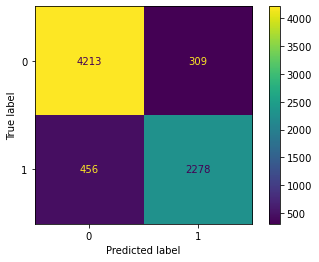

In [126]:
#Confussion Matrix train Set
ConfusionMatrixDisplay.from_estimator(lr, X_train_concat, y_train)
plt.show()

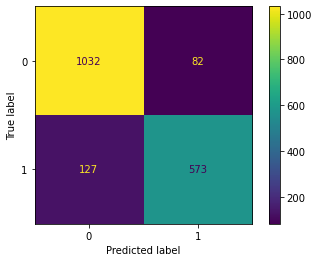

In [128]:
#Confussion Matrix test Set
ConfusionMatrixDisplay.from_estimator(lr, X_test_concat, y_test)
plt.show()

### Decision Trees

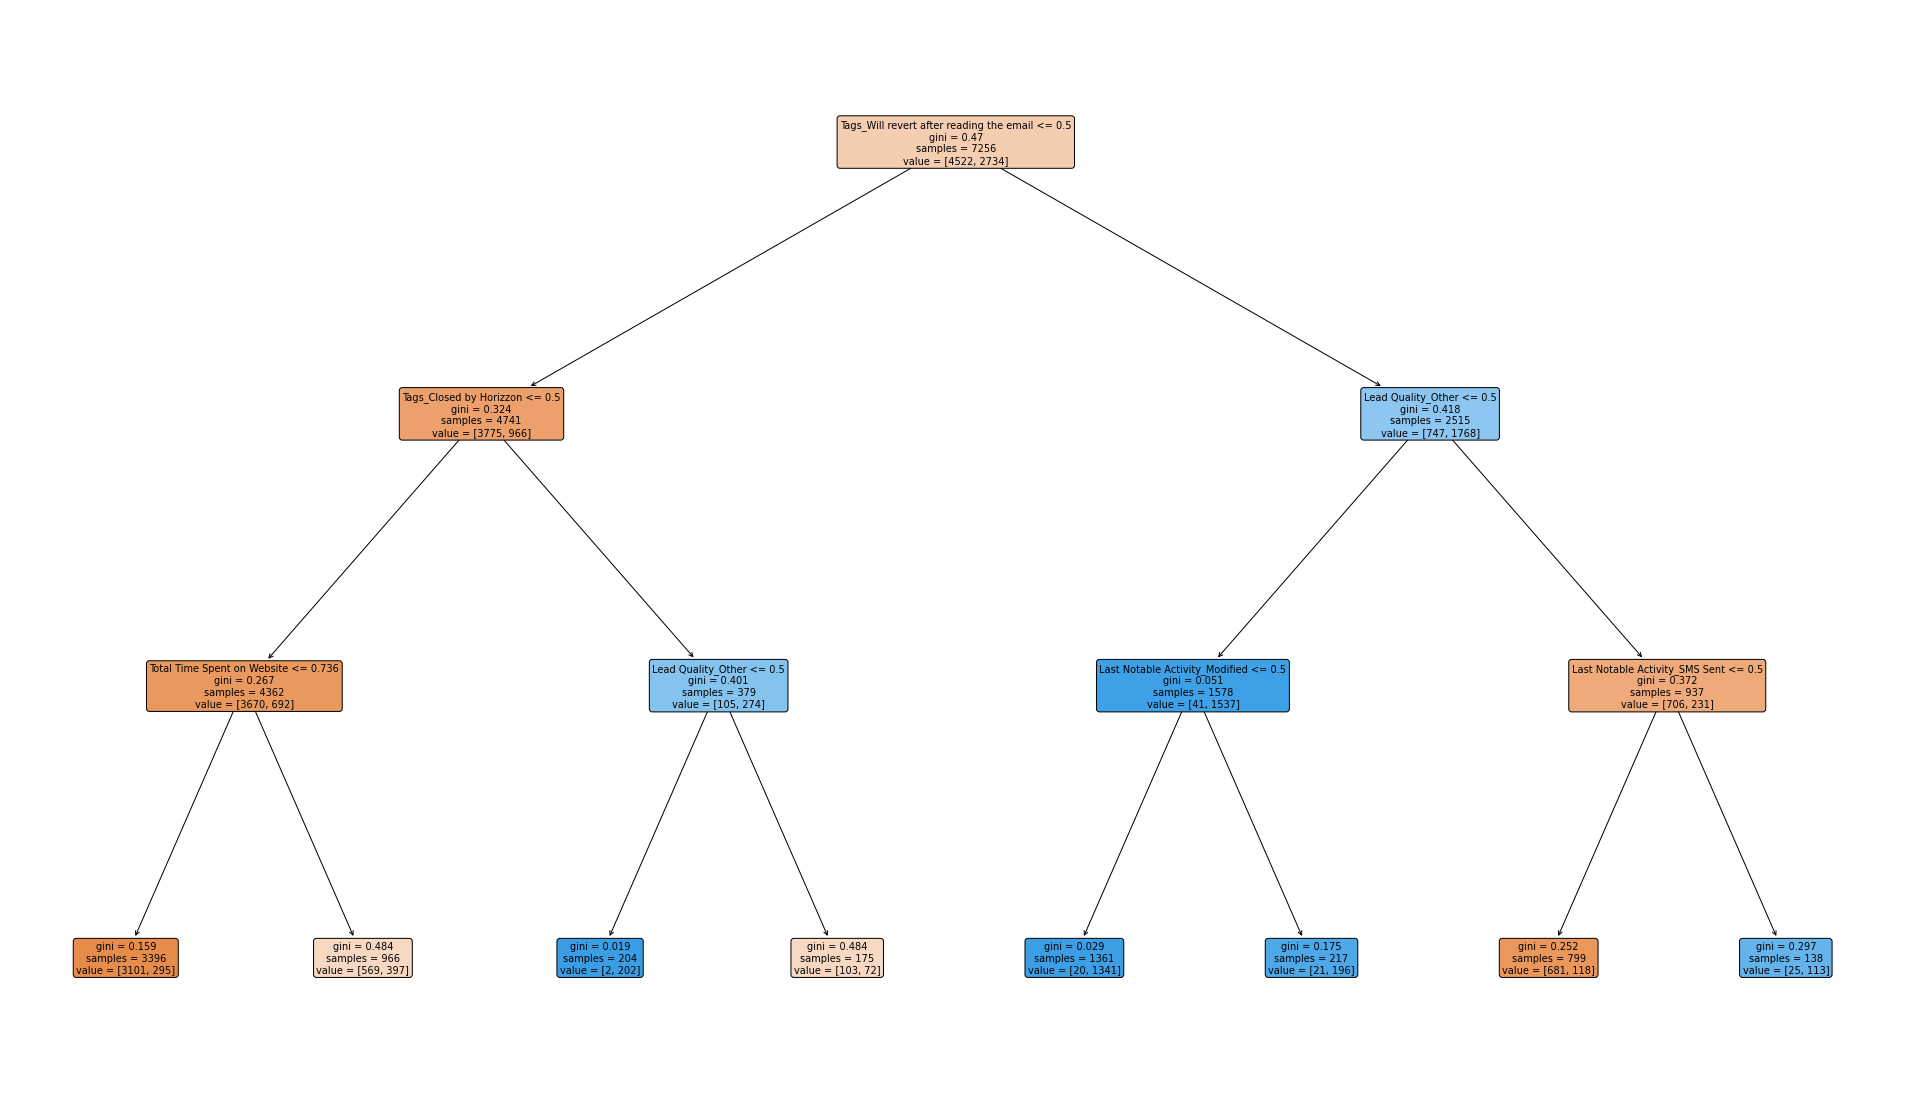

In [255]:
#Decision Tree on test set
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_concat, y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X_train_concat.columns)
plt.show() 

### Random Forect Classifier

In [274]:
rfc = RandomForestClassifier(max_depth=8, random_state=42)
rfc.fit(X_train_concat, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [275]:
y_predict_train = rfc.predict(X_train_concat)
print("RandomForestClassifier params on train set: \n",classification_report(y_train, y_predict_train))


y_predict_test = rfc.predict(X_test_concat)
print("RandomForestClassifier params on test set: \n", classification_report(y_test, y_predict_test))

RandomForestClassifier params on train set: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      4522
           1       0.96      0.80      0.87      2734

    accuracy                           0.91      7256
   macro avg       0.93      0.89      0.90      7256
weighted avg       0.92      0.91      0.91      7256

RandomForestClassifier params on test set: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1114
           1       0.94      0.79      0.86       700

    accuracy                           0.90      1814
   macro avg       0.91      0.88      0.89      1814
weighted avg       0.90      0.90      0.90      1814



### KNeighbors Classifier

In [267]:
knn = KNeighborsClassifier(n_neighbors=8) 
knn.fit(X_train_concat, y_train)
print("Score of KNN Neighbor score on train set :",knn.score(X_train_concat, y_train))
print("Score of KNN Neighbor score on test set :",knn.score(X_test_concat, y_test))

Score of KNN Neighbor score on train set : 0.9082138919514884
Score of KNN Neighbor score on test set : 0.8770672546857773


In [276]:
y_predict_train = knn.predict(X_train_concat)
print("KNeighborsClassifier params on train set: \n",classification_report(y_train, y_predict_train))


y_predict_test = knn.predict(X_test_concat)
print("KNeighborsClassifier params on test set: \n", classification_report(y_test, y_predict_test))

KNeighborsClassifier params on train set: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      4522
           1       0.94      0.81      0.87      2734

    accuracy                           0.91      7256
   macro avg       0.92      0.89      0.90      7256
weighted avg       0.91      0.91      0.91      7256

KNeighborsClassifier params on test set: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1114
           1       0.89      0.77      0.83       700

    accuracy                           0.88      1814
   macro avg       0.88      0.86      0.87      1814
weighted avg       0.88      0.88      0.88      1814



### Accuracy comparison with ROC

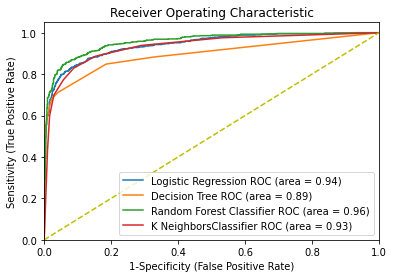

In [268]:
#ROC curve model comparison
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(solver='saga', max_iter=1000, random_state=42),
},
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(max_depth=3, random_state=42),
},
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(max_depth=8, random_state=42),
},
{
    'label': 'K NeighborsClassifier',
    'model': KNeighborsClassifier(n_neighbors=8),
}]


for m in models:
    model = m['model'] # select the model
    model.fit(X_train_concat, y_train) # train the model
    y_pred=model.predict(X_test_concat) # predict the test data
# Compute False positive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test_concat)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test_concat)[:,1])
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'y--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   
    
#the winner is.. -> Random Forest Classifier

### Feature Importance

In [288]:
rfc.fit(X_test_concat, y_test)
f_names = X_test_concat.columns
f_names = list(feature_names)

In [291]:
ftrs = pd.DataFrame(list(zip(f_names, rfc.feature_importances_)))
ftrs.columns = ['columns_name', 'score_feature_importance']
ftrs = ftrs.sort_values(by=['score_feature_importance'],ignore_index=True, ascending = False,)
ftrs.head(5)

,columns_name,score_feature_importance
0,Tags_Will revert after reading the email,0.159669
1,Total Time Spent on Website,0.113773
2,Lead Quality_Other,0.104923
3,Last Notable Activity_SMS Sent,0.074017
4,Tags_Ringing,0.051869
